In [1]:
%pip install -qq InstructorEmbedding
%pip install -qq --force-reinstall -U setuptools
%env TOKENIZERS_PARALLELISM=false

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
env: TOKENIZERS_PARALLELISM=false


In [2]:
from InstructorEmbedding import INSTRUCTOR

model = INSTRUCTOR("hkunlp/instructor-base")

/Users/yujonglee/dev/fastrepl/.venv/lib/python3.11/site-packages/InstructorEmbedding/instructor.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


load INSTRUCTOR_Transformer
max_seq_length  512


In [3]:
from fastrepl.polish import Updatable
from fastrepl.run import completion


def embed(sentence: str):
    instruction = Updatable(
        key="instruction",
        value="Represent the Science title:",
    ).value

    return model.encode([[instruction, sentence]])


def ask(question: str, context: str):
    system_prefix = Updatable(
        key="system_prefix",
        value="You are a helpful AI. Answer the question using the following information:",
    ).value

    return (
        completion(
            model="gpt-3.5-turbo",  # TODO: selectable
            messages=[
                {"role": "system", "content": f"{system_prefix} {context}"},
                {"role": "user", "content": question},
            ],
            temperature=0.0,
        )
        .choices[0]
        .message.content
    )


def ask2(question: str, context: str):
    system_prefix = Updatable(
        key="system_prefix",
        value="You are a helpful AI. Answer the question using the following information:",
    ).value

    return (
        completion(
            model="gpt-3.5-turbo",  # TODO: selectable
            messages=[
                {"role": "system", "content": f"{system_prefix} {context}"},
                {"role": "user", "content": question},
            ],
            temperature=0.0,
        )
        .choices[0]
        .message.content
    )


def pipeline(question: str, context: str):
    embedding = embed(context)
    return ask(question, context)


def pipeline2(question: str, context: str):
    embedding = embed(context)
    return ask2(question, context)

/Users/yujonglee/dev/fastrepl/fastrepl/context/analyze.py:28: UserWarning: 'instruction' already exists in VariableContext('3139889817.py', 'embed'). Maybe you forgot to call 'next_run()'?
  warnings.warn(
/Users/yujonglee/dev/fastrepl/fastrepl/context/analyze.py:28: UserWarning: 'system_prefix' already exists in VariableContext('3139889817.py', 'ask'). Maybe you forgot to call 'next_run()'?
  warnings.warn(


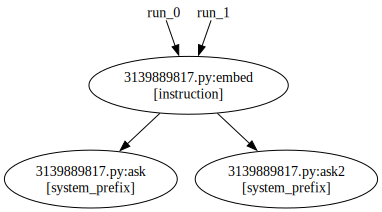

In [7]:
from IPython.display import display
from fastrepl import Analyze

with Analyze() as ctr:
    pipeline("", "")
    ctr.next_run()
    pipeline2("", "")
    display(ctr.build_graph(GRAPH=3))

In [5]:
from fastrepl import REPL
from fastrepl.eval.metric import load_metric

metrics = [
    load_metric("f1"),
    load_metric("accuracy"),
]

with REPL() as ctr:
    pipeline("", "")

In [6]:
import numpy as np
from sklearn.decomposition import PCA